In [ ]:
# Importando libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Input, Dense

In [ ]:
# Sequential (armazena a sequencia de camadas (input e dense) que vão compor a rede neural). Input (possui propriedades de uma camada de entrada da rede neural). Dense (possui características de camada dense, multilayer)

In [ ]:
# Importando o Dataset

In [2]:
dataset = boston_housing.load_data(test_split=.3, seed=256402)

57026/57026 [==============================] - 0s 0us/step


In [3]:
pd.DataFrame(dataset[0][0])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,6.80117,0.0,18.10,0.0,0.713,6.081,84.4,2.7175,24.0,666.0,20.2,396.90,14.70
1,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86
2,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
350,0.28955,0.0,10.59,0.0,0.489,5.412,9.8,3.5875,4.0,277.0,18.6,348.93,29.55
351,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
352,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37


In [4]:
pd.DataFrame(dataset[0][1])

,0
0,20.0
1,33.1
2,50.0
3,21.1
4,11.0
...,...
349,19.7
350,23.7
351,23.1
352,12.5


In [ ]:
# Trabalhando o dataset e separando o conjunto de treino e teste

In [5]:
treino = pd.concat([pd.DataFrame(dataset[0][0]),pd.DataFrame(dataset[0][1])], axis = 1, ignore_index=True)
teste = pd.concat([pd.DataFrame(dataset[1][0]),pd.DataFrame(dataset[1][1])], axis = 1, ignore_index=True)

In [6]:
x_treino = treino[[2,7,8]].values

In [7]:
y_treino = treino[[13]].values

In [8]:
x_teste = treino[[2,7,8]].values
y_teste = treino[[13]].values

In [ ]:
# Modelo

In [9]:
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(144, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 144)               576       
                                                                 
 dense_1 (Dense)             (None, 100)               14500     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,177
Trainable params: 15,177
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mae')

In [11]:
tentativa_1 = model.fit(x_treino, y_treino, epochs=200, batch_size = 6)

Epoch 1/200
59/59 [==============================] - 1s 1ms/step - loss: 10.6087
Epoch 2/200
59/59 [==============================] - 0s 1ms/step - loss: 7.1314
Epoch 3/200
59/59 [==============================] - 0s 1ms/step - loss: 6.8478
Epoch 4/200
59/59 [==============================] - 0s 1ms/step - loss: 6.7521
Epoch 5/200
59/59 [==============================] - 0s 1ms/step - loss: 6.7360
Epoch 6/200
59/59 [==============================] - 0s 1ms/step - loss: 6.5690
Epoch 7/200
59/59 [==============================] - 0s 1ms/step - loss: 6.5712
Epoch 8/200
59/59 [==============================] - 0s 1ms/step - loss: 6.4170
Epoch 9/200
59/59 [==============================] - 0s 1ms/step - loss: 6.5170
Epoch 10/200
59/59 [==============================] - 0s 1ms/step - loss: 6.4603
Epoch 11/200
59/59 [==============================] - 0s 1ms/step - loss: 6.3753
Epoch 12/200
59/59 [==============================] - 0s 1ms/step - loss: 6.4160
Epoch 13/200
59/59 [================

In [12]:
analise = pd.concat([pd.DataFrame(y_teste),pd.DataFrame(model.predict(x_teste))], axis = 1, ignore_index=True)

12/12 [==============================] - 0s 1ms/step


In [13]:
abs(analise[0] - analise[1]).mean()

4.234059785853671

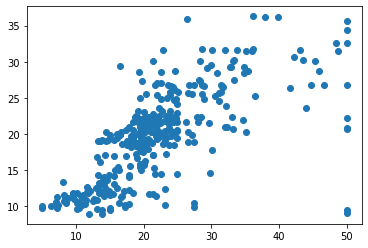

In [14]:
plt.scatter(x=analise[0], y=analise[1])

(array([  6.,  57., 181.,  73.,  16.,  13.,   3.,   3.,   0.,   2.]),
 array([-12.83529282,  -7.45278463,  -2.07027645,   3.31223173,
          8.69473991,  14.0772481 ,  19.45975628,  24.84226446,
         30.22477264,  35.60728083,  40.98978901]),
 <a list of 10 Patch objects>)

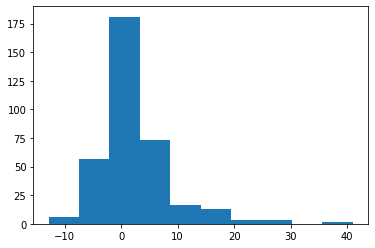

In [15]:
plt.hist(analise[0] - analise[1])

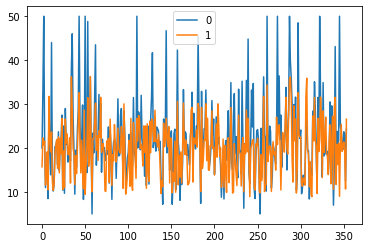

In [16]:
analise.plot()

In [ ]:
# Novo modelo com todas as variáveis

In [40]:
[i for i in range(0,13)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [31]:
x_treino_2=treino[[i for i in range(0,13)]].values
x_teste_2=teste[[i for i in range(0,13)]].values

In [32]:
x_treino_2.shape

(354, 13)

In [48]:
model_2 = Sequential()
model_2.add(Input(shape=(13,)))
model_2.add(Dense(144, activation='relu'))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 144)               2016      
                                                                 
 dense_16 (Dense)            (None, 100)               14500     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 16,617
Trainable params: 16,617
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_2.compile(loss='mae')

In [50]:
tentativa_2 = model_2.fit(x_treino_2, y_treino, epochs=200, batch_size = 6)

Epoch 1/200
59/59 [==============================] - 0s 1ms/step - loss: 18.2770
Epoch 2/200
59/59 [==============================] - 0s 1ms/step - loss: 13.5135
Epoch 3/200
59/59 [==============================] - 0s 1ms/step - loss: 11.1915
Epoch 4/200
59/59 [==============================] - 0s 1ms/step - loss: 10.4971
Epoch 5/200
59/59 [==============================] - 0s 1ms/step - loss: 9.1767
Epoch 6/200
59/59 [==============================] - 0s 1ms/step - loss: 8.5884
Epoch 7/200
59/59 [==============================] - 0s 1ms/step - loss: 7.8819
Epoch 8/200
59/59 [==============================] - 0s 1ms/step - loss: 7.4325
Epoch 9/200
59/59 [==============================] - 0s 1ms/step - loss: 7.1162
Epoch 10/200
59/59 [==============================] - 0s 1ms/step - loss: 6.7690
Epoch 11/200
59/59 [==============================] - 0s 1ms/step - loss: 6.5245
Epoch 12/200
59/59 [==============================] - 0s 1ms/step - loss: 6.3640
Epoch 13/200
59/59 [=============

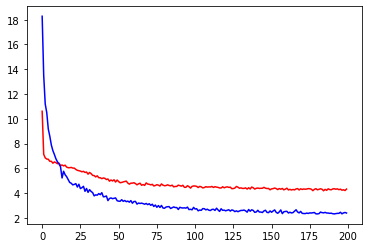

In [51]:
plt.plot(tentativa_1.history['loss'], 'r-')
plt.plot(tentativa_2.history['loss'], 'b-')

In [52]:
model_3 = Sequential()
model_3.add(Input(shape=(13,)))
model_3.add(Dense(144, activation='relu'))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(1, activation='linear'))

model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 144)               2016      
                                                                 
 dense_19 (Dense)            (None, 100)               14500     
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
Total params: 16,617
Trainable params: 16,617
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_3.compile(loss='mae')

In [54]:
tentativa_3 = model_3.fit(x_treino_2, y_treino, epochs=200, batch_size = 1)

Epoch 1/200
354/354 [==============================] - 1s 2ms/step - loss: 13.6525
Epoch 2/200
354/354 [==============================] - 1s 3ms/step - loss: 8.7788
Epoch 3/200
354/354 [==============================] - 1s 2ms/step - loss: 6.9622
Epoch 4/200
354/354 [==============================] - 0s 962us/step - loss: 6.4247
Epoch 5/200
354/354 [==============================] - 0s 1ms/step - loss: 5.7146
Epoch 6/200
354/354 [==============================] - 0s 1ms/step - loss: 5.4355
Epoch 7/200
354/354 [==============================] - 0s 1ms/step - loss: 5.1482
Epoch 8/200
354/354 [==============================] - 0s 1ms/step - loss: 4.8853
Epoch 9/200
354/354 [==============================] - 0s 991us/step - loss: 4.8030
Epoch 10/200
354/354 [==============================] - 0s 1ms/step - loss: 4.4656
Epoch 11/200
354/354 [==============================] - 0s 1ms/step - loss: 4.3460
Epoch 12/200
354/354 [==============================] - 0s 1ms/step - loss: 4.3216
Epoch 13

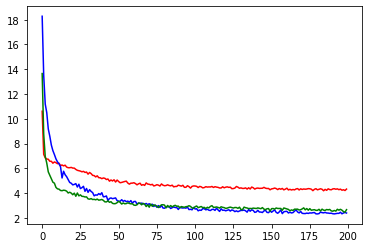

In [55]:
plt.plot(tentativa_1.history['loss'], 'r-')
plt.plot(tentativa_2.history['loss'], 'b-')
plt.plot(tentativa_3.history['loss'], 'g-')

In [ ]:
# modelo 4 - todas as variáveis + batch = 1 + valores normalizados

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler= MinMaxScaler()

In [47]:
scaler.fit(x_treino_2)
x_treino_2_norm = scaler.transform(x_treino_2)

In [56]:
model_4 = Sequential()
model_4.add(Input(shape=(13,)))
model_4.add(Dense(144, activation='relu'))
model_4.add(Dense(100, activation='relu'))
model_4.add(Dense(1, activation='linear'))
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 144)               2016      
                                                                 
 dense_22 (Dense)            (None, 100)               14500     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 16,617
Trainable params: 16,617
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_4.compile(loss='mae')

In [59]:
tentativa_4 = model_4.fit(x_treino_2_norm, y_treino, epochs=200, batch_size = 1)

Epoch 1/200
354/354 [==============================] - 1s 1ms/step - loss: 8.1149
Epoch 2/200
354/354 [==============================] - 0s 999us/step - loss: 4.4951
Epoch 3/200
354/354 [==============================] - 0s 1ms/step - loss: 3.8858
Epoch 4/200
354/354 [==============================] - 0s 1ms/step - loss: 3.4289
Epoch 5/200
354/354 [==============================] - 0s 1ms/step - loss: 3.2220
Epoch 6/200
354/354 [==============================] - 0s 1ms/step - loss: 3.0459
Epoch 7/200
354/354 [==============================] - 0s 1ms/step - loss: 2.9889
Epoch 8/200
354/354 [==============================] - 0s 1ms/step - loss: 2.8419
Epoch 9/200
354/354 [==============================] - 0s 991us/step - loss: 2.8158
Epoch 10/200
354/354 [==============================] - 0s 1ms/step - loss: 2.7596
Epoch 11/200
354/354 [==============================] - 0s 1ms/step - loss: 2.8204
Epoch 12/200
354/354 [==============================] - 0s 1ms/step - loss: 2.7301
Epoch 13/

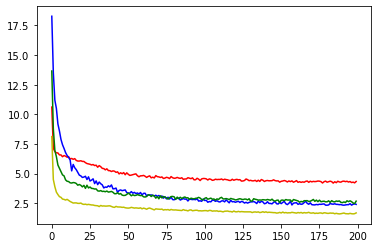

In [60]:
plt.plot(tentativa_1.history['loss'], 'r-')
plt.plot(tentativa_2.history['loss'], 'b-')
plt.plot(tentativa_3.history['loss'], 'g-')
plt.plot(tentativa_4.history['loss'], 'y-')